# Perceptron in PyTorch: The Manual Way

Before we use the high-level tools (`nn.Linear`), we must understand what they do.
We are going to build a Perceptron using **only Tensors and Autograd**.

### The Goal
Train a single neuron to solve the **AND** gate:
- Input: `[0, 0]`, `[0, 1]`, `[1, 0]`, `[1, 1]`
- Target: `0, 0, 0, 1`

In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Data (AND Gate)
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = torch.tensor([[0.0], [0.0], [0.0], [1.0]])

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: torch.Size([4, 2])
y shape: torch.Size([4, 1])


## Initialize Weights (The "Brain")
A neuron is just Weights ($w$) and Bias ($b$).
We set `requires_grad=True` so PyTorch tracks changes.

In [63]:
torch.manual_seed(42)

# Random weights, initialized with gradient tracking turned ON
w = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(f"Initial Weights:\n{w}")
print(f"Initial Bias:\n{b}")

Initial Weights:
tensor([[0.3367],
        [0.1288]], requires_grad=True)
Initial Bias:
tensor([0.2345], requires_grad=True)


## The Training Loop (Manual)
Here is the cycle of life for a Neural Network:
1.  **Forward:** Compute prediction ($y = X \cdot w + b$).
2.  **Loss:** Calculate error (MSE: $(y - \hat{y})^2$).
3.  **Backward:** `loss.backward()` (Find gradients).
4.  **Update:** Adjust weights slightly in the opposite direction of the gradient.

In [64]:
learning_rate = 0.2
epochs = 151
losses = []

for epoch in range(epochs):
    # 1. Forward Pass
    # We use Sigmoid activation to squash output between 0 and 1
    z = X @ w + b
    y_pred = torch.sigmoid(z)
    
    # 2. Compute Loss (Mean Squared Error)
    loss = ((y_pred - y)**2).mean()
    losses.append(loss.item())
    
    # 3. Backward Pass (The Magic)
    loss.backward()
    
    # 4. Update Weights
    # We use 'with torch.no_grad()' because we don't want to track this update step in the gradient graph
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        
        # IMPORTANT: Reset gradients to zero for the next loop
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 0.2945
Epoch 10: Loss = 0.2415
Epoch 20: Loss = 0.2120
Epoch 30: Loss = 0.1946
Epoch 40: Loss = 0.1827
Epoch 50: Loss = 0.1736
Epoch 60: Loss = 0.1659
Epoch 70: Loss = 0.1592
Epoch 80: Loss = 0.1530
Epoch 90: Loss = 0.1474
Epoch 100: Loss = 0.1421
Epoch 110: Loss = 0.1372
Epoch 120: Loss = 0.1326
Epoch 130: Loss = 0.1284
Epoch 140: Loss = 0.1244
Epoch 150: Loss = 0.1206


## Evaluate and Visualize
Did it learn the logic?

In [65]:
print("Final Predictions:")
with torch.no_grad():
    print(torch.sigmoid(X @ w + b).round())

Final Predictions:
tensor([[0.],
        [0.],
        [0.],
        [1.]])


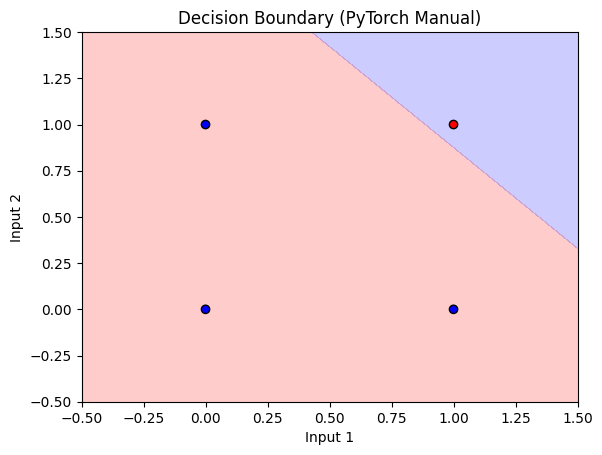

In [66]:
# Plotting the decision boundary
def plot_boundary(w, b):
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = np.linspace(-0.5, 1.5, 100)
    xx1, xx2 = np.meshgrid(x1, x2)
    
    grid = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)
    with torch.no_grad():
        z = grid @ w + b
        probs = torch.sigmoid(z).reshape(xx1.shape)
        
    plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='bwr', edgecolors='k')
    plt.title("Decision Boundary (PyTorch Manual)")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_boundary(w, b)

### Summary
We built a neural network without a library like Keras or Scikit-Learn `MLPClassifier`.
We controlled the gradient descent explicitly.

This manual update loop is tedious for big networks. In the next, we will use `torch.nn` and `torch.optim` to automate this.